# VGG

## Import libraries

In [17]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers

In [18]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Basic data statistics

In [19]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


## Pixel wise standardization

In [20]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std

## To_categoriacal

In [21]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Change data shape

In [22]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## Spit data 

In [23]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


## Perform some data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


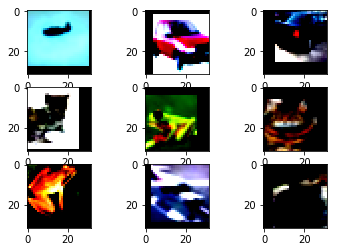

In [24]:
datagen = ImageDataGenerator(fill_mode='constant',
                             width_shift_range=0.2,
                            height_shift_range=0.2,
                             cval=0,
                             horizontal_flip=True
                            )

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Build model

In [54]:
print(X_train.shape)

vgg = keras.applications.vgg16.VGG16(include_top=False,
weights='imagenet',
input_shape=X_train.shape[1:])


for layer in vgg.layers[:-2]:
    layer.trainable = False
    
model = Sequential()
model.add(vgg)
##model.add(Conv2D(64, (5,5), activation='relu'))
##model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

(40000, 32, 32, 3)


## Compile model

In [55]:
adam = keras.optimizers.Adam(lr=0.001, epsilon=1e-8)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'],)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 2,493,706
Non-trainable params: 12,354,880
_________________________________________________________________


## Train the model on images with slight augmentation

In [56]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=20),
                   epochs=10,
                   steps_per_epoch=200,
                   validation_data=(X_val, y_val),
                   verbose=1)

Epoch 1/10
200/200 [==============================] - 168s 839ms/step - loss: 1.6415 - acc: 0.4220 - val_loss: 1.4079 - val_acc: 0.5193
Epoch 2/10
200/200 [==============================] - 169s 846ms/step - loss: 1.3242 - acc: 0.5290 - val_loss: 1.3026 - val_acc: 0.5576
Epoch 3/10
200/200 [==============================] - 174s 869ms/step - loss: 1.3090 - acc: 0.5295 - val_loss: 1.2110 - val_acc: 0.5773
Epoch 4/10
200/200 [==============================] - 178s 888ms/step - loss: 1.2716 - acc: 0.5425 - val_loss: 1.1939 - val_acc: 0.5933
Epoch 5/10
200/200 [==============================] - 174s 869ms/step - loss: 1.2240 - acc: 0.5733 - val_loss: 1.1615 - val_acc: 0.6004
Epoch 6/10
200/200 [==============================] - 179s 894ms/step - loss: 1.2170 - acc: 0.5615 - val_loss: 1.1608 - val_acc: 0.5932
Epoch 7/10
200/200 [==============================] - 181s 903ms/step - loss: 1.1646 - acc: 0.5780 - val_loss: 1.1737 - val_acc: 0.6063
Epoch 8/10
200/200 [============================

## Test loss and accuracy

In [57]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 106s 11ms/step
Test loss:  1.1369646940231324
Test acc:  0.6083


## Visualise and analyze

#### Loss

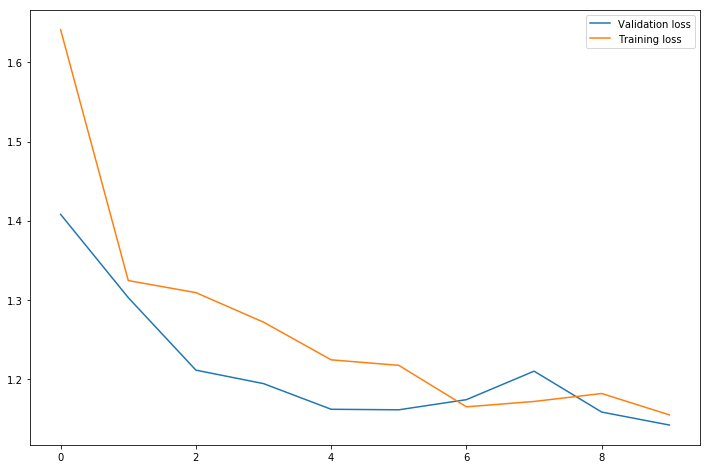

In [58]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")

plt.legend()

#### Accuracy

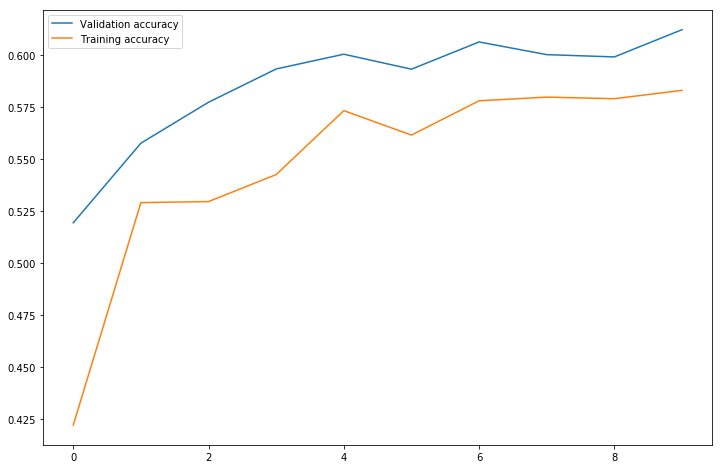

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()